In [1]:
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
to_categorical = tf.keras.utils.to_categorical
Sequential = tf.keras.models.Sequential
Conv2D = tf.keras.layers.Conv2D
MaxPooling2D = tf.keras.layers.MaxPooling2D
Flatten = tf.keras.layers.Flatten
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout

In [2]:
# Load dataset

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess dataset
train_images: np.ndarray = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images: np.ndarray = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Function to train model and measure time
def train_model(device):
    with tf.device(device):
        model = create_model()
        start_time = time.time()
        model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.3)
        end_time = time.time()
    return model, end_time - start_time

# Train on CPU
cpu_model, cpu_time = train_model('/CPU:0')
print(f'Training time on CPU: {cpu_time} seconds')

# Train on GPU
if tf.config.list_physical_devices('GPU'):
    gpu_model, gpu_time = train_model('/GPU:0')
    print(f'Training time on GPU: {gpu_time} seconds')
else:
    print('No GPU found.')


Epoch 1/5
657/657 [==============================] - 12s 18ms/step - loss: 0.2108 - accuracy: 0.9349 - val_loss: 0.0548 - val_accuracy: 0.9827
Epoch 2/5
657/657 [==============================] - 12s 18ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0426 - val_accuracy: 0.9865
Epoch 3/5
657/657 [==============================] - 12s 18ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0410 - val_accuracy: 0.9882
Epoch 4/5
657/657 [==============================] - 12s 18ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0429 - val_accuracy: 0.9878
Epoch 5/5
657/657 [==============================] - 12s 18ms/step - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0407 - val_accuracy: 0.9882
Training time on CPU: 59.46359872817993 seconds
Epoch 1/5
657/657 [==============================] - 3s 3ms/step - loss: 0.2090 - accuracy: 0.9343 - val_loss: 0.0619 - val_accuracy: 0.9803
Epoch 2/5
657/657 [==============================] - 2s 3ms/step - loss: 0.0554 - accuracy: 0.98

CPU Model Predictions:
313/313 [==============================] - 0s 1ms/step
First 5 Correct Predictions:


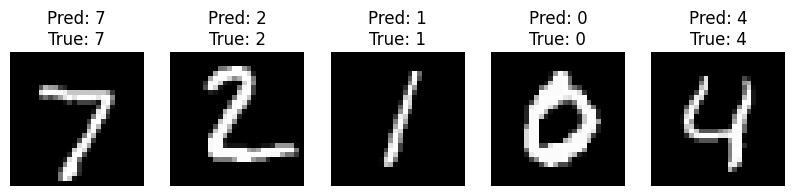

First 5 Incorrect Predictions:


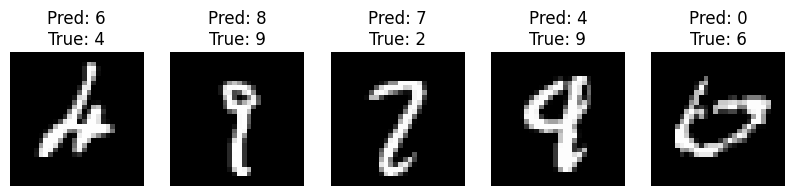

GPU Model Predictions:
313/313 [==============================] - 0s 821us/step
First 5 Correct Predictions:


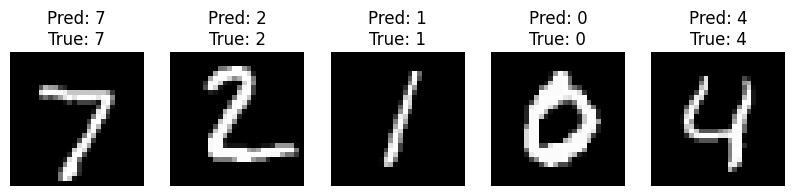

First 5 Incorrect Predictions:


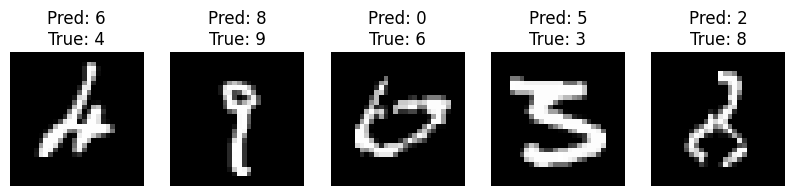

In [5]:
def display_predictions(model):
    # Predict on test images
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(test_labels, axis=1)

    # Identify correctly and incorrectly classified images
    correct_indices = np.where(predicted_labels == true_labels)[0]
    incorrect_indices = np.where(predicted_labels != true_labels)[0]

    # Display first 5 correct predictions
    print("First 5 Correct Predictions:")
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(correct_indices[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predicted_labels[idx]}\nTrue: {true_labels[idx]}")
        plt.axis('off')
    plt.show()

    # Display first 5 incorrect predictions
    print("First 5 Incorrect Predictions:")
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(incorrect_indices[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predicted_labels[idx]}\nTrue: {true_labels[idx]}")
        plt.axis('off')
    plt.show()

# Display predictions for CPU model
print("CPU Model Predictions:")
display_predictions(cpu_model)

# Display predictions for GPU model (if available)
if tf.config.list_physical_devices('GPU'):
    print("GPU Model Predictions:")
    display_predictions(gpu_model)